In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv(r"D:\Datasetss\retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [14]:
daily_sales = df.groupby(['Date', 'Product Category'])['Quantity'].sum().unstack().fillna(0)


daily_sales = daily_sales.asfreq('D')


daily_sales = daily_sales.interpolate(method='time')

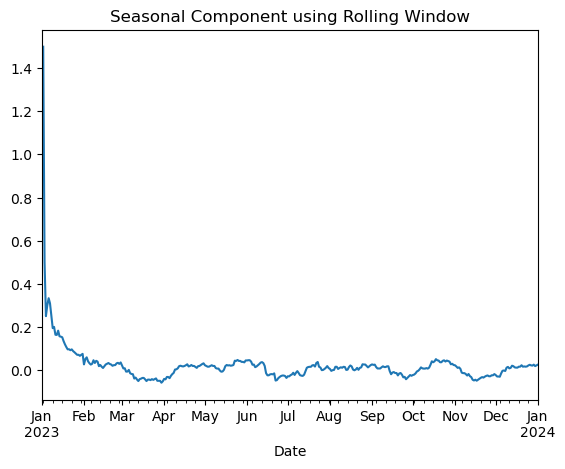

In [15]:
rolling_window = 30  
decomposition = daily_sales['Electronics'].rolling(window=rolling_window, min_periods=1).mean().diff().rolling(window=rolling_window, min_periods=1).mean()
decomposition.plot()
plt.title('Seasonal Component using Rolling Window')
plt.show()

In [16]:
train = daily_sales['Electronics'][:'2023-12-31']
test = daily_sales['Electronics']['2024-01-01':]

In [17]:
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [18]:
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

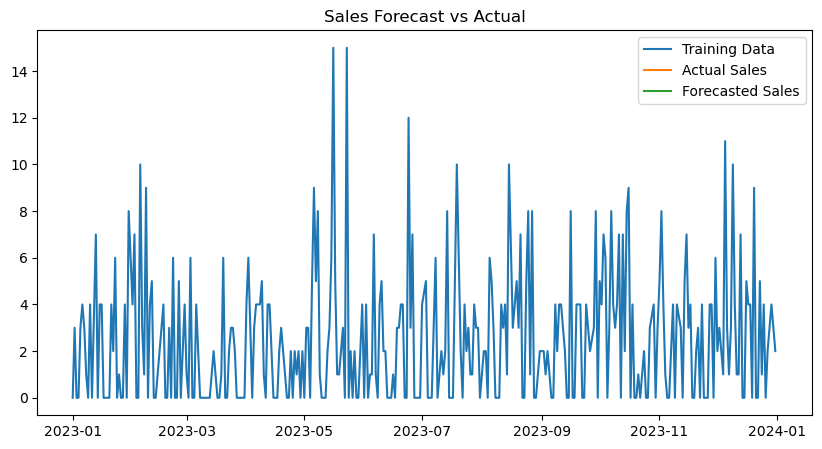

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Actual Sales')
plt.plot(forecast.index, forecast.values, label='Forecasted Sales')
plt.title('Sales Forecast vs Actual')
plt.legend()
plt.show()

In [20]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.9944946031703523
Mean Squared Error: 3.978008722075661
Root Mean Squared Error: 1.9944946031703523


In [77]:
import os

output_path = r'D:\Demand_Forecasting_for_a_Retail_Store\uploads\retail_sales_dataset.csv'
data.to_csv(output_path, index=False)

# Print the location of the saved file
print("File saved to:", os.path.abspath(output_path))


File saved to: D:\Demand_Forecasting_for_a_Retail_Store\uploads\retail_sales_dataset.csv
